In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

               age     trestbps         chol      thalach      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.354827     0.273973     0.596291     0.172825   
std       0.189006     0.165252     0.117791     0.175616     0.189503   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.245283     0.194064     0.465649     0.000000   
50%       0.562500     0.339623     0.260274     0.618321     0.129032   
75%       0.666667     0.433962     0.340183     0.725191     0.290323   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            target        sex_0        sex_1         cp_0         cp_1  ...  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  ...   
mean      0.513171     0.304390     0.695610     0.484878     0.162927  ...   
std       0.500070     0.460373     0.460373     0.500015     0.369479  ...   
min       0.00000

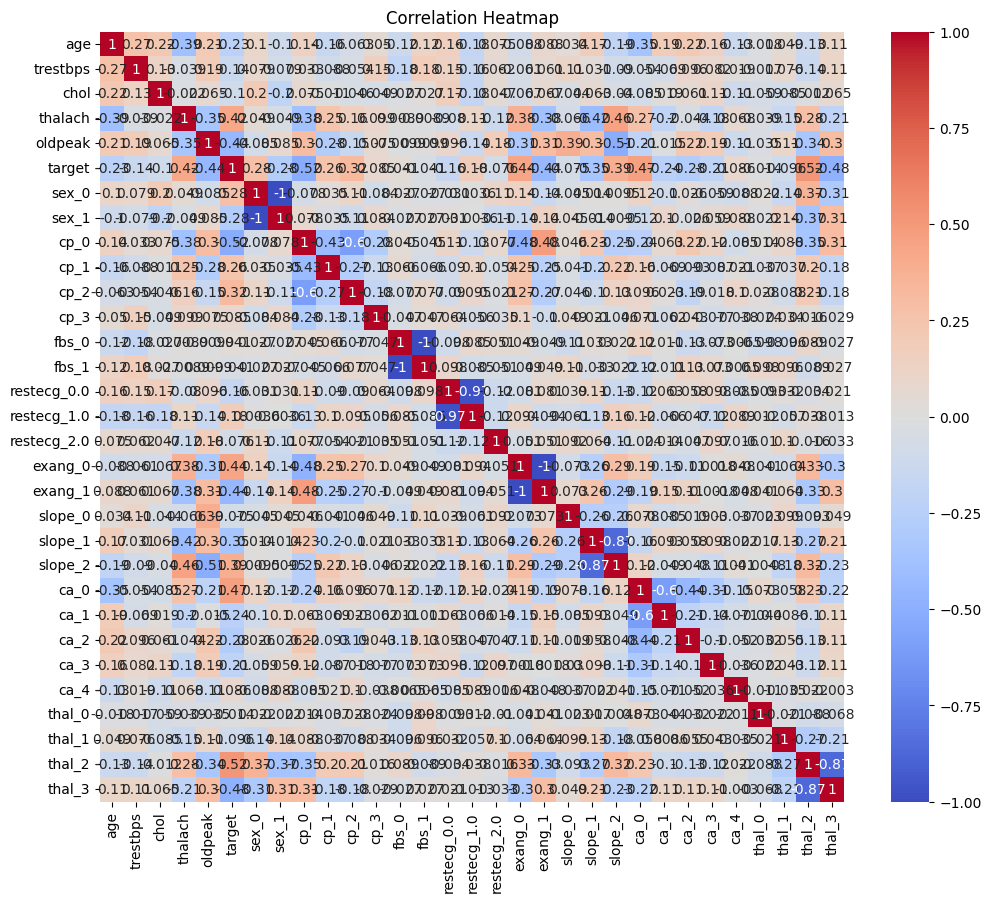

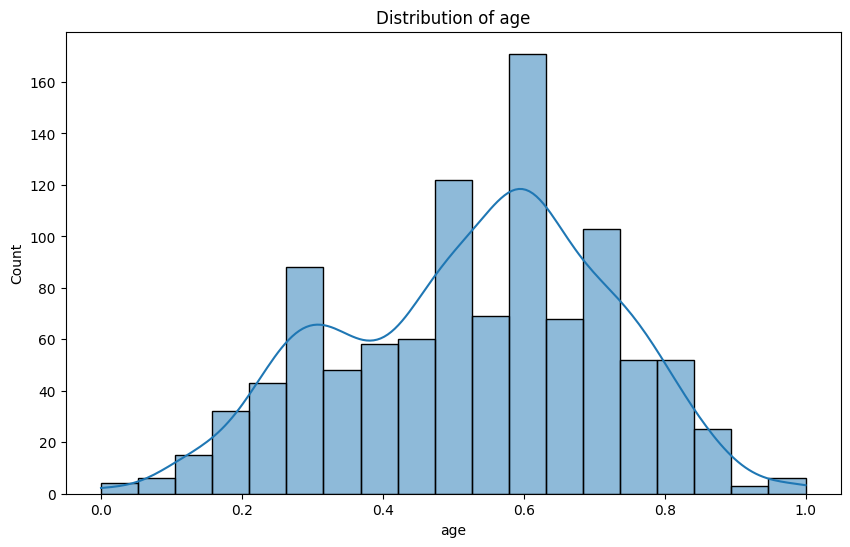

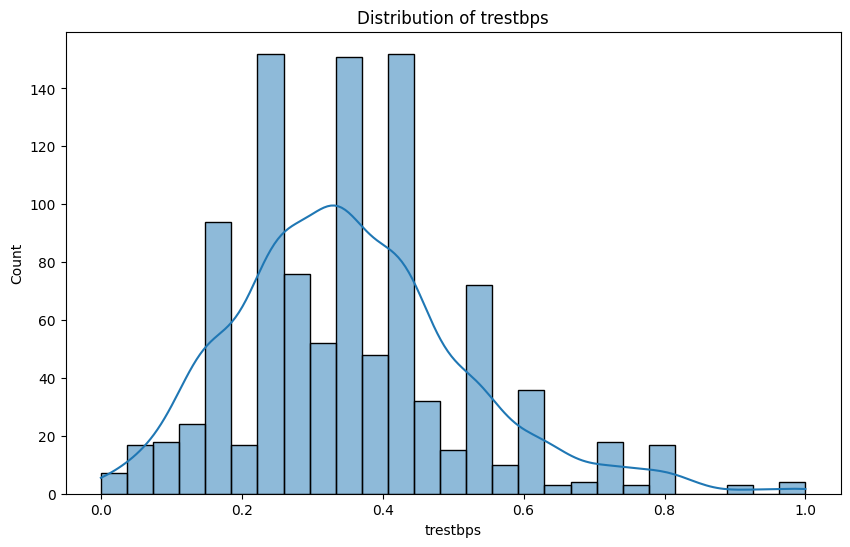

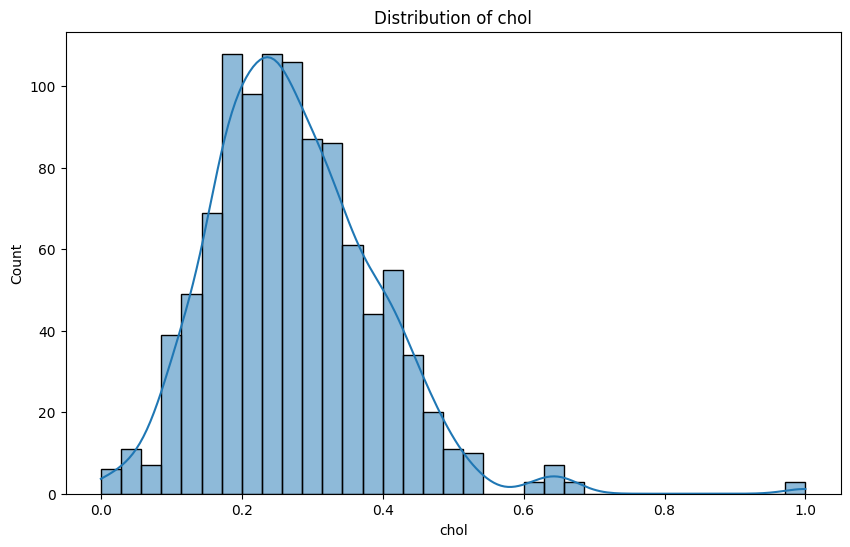

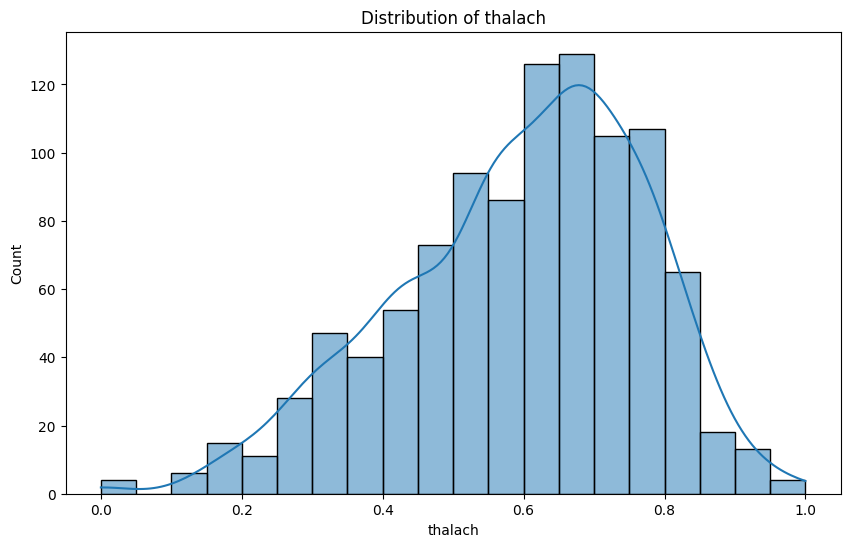

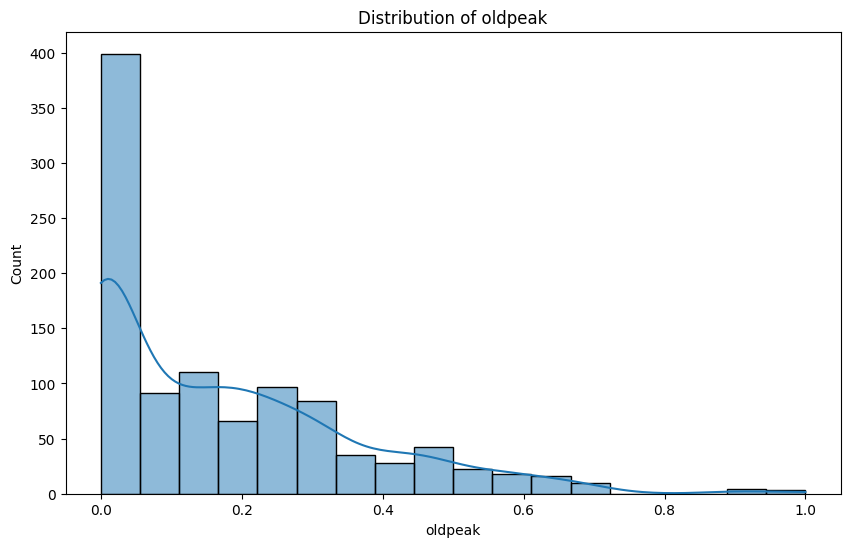

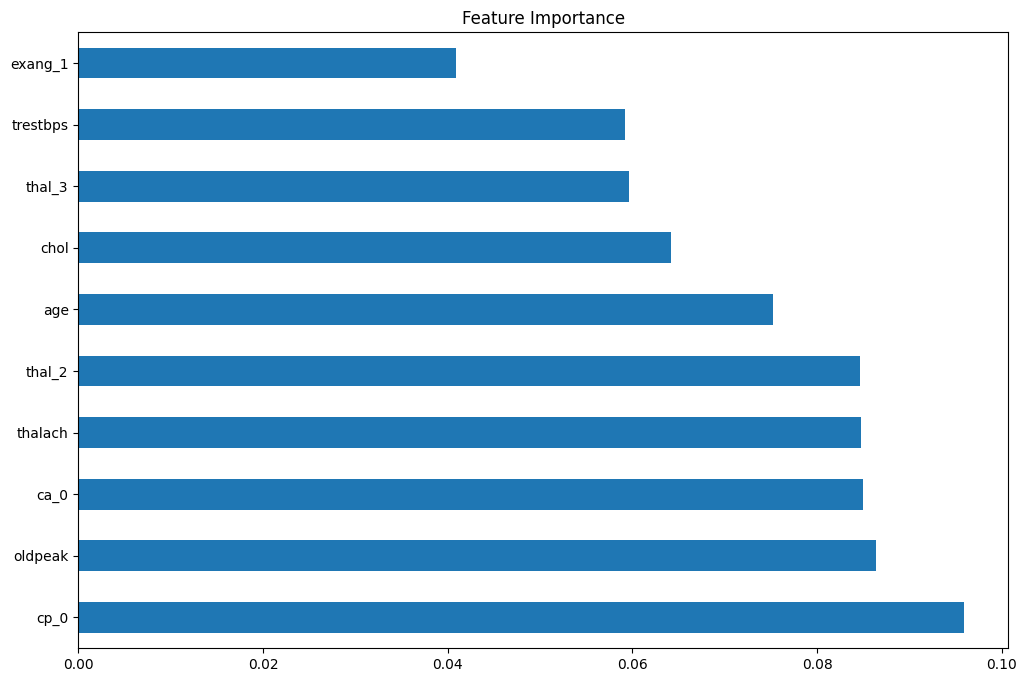

In [3]:
# Load cleaned data
df = pd.read_csv("../data/cleaned_data.csv")
 
# Statistical summary
print(df.describe())
 
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("../reports/correlation_heatmap.png")
plt.show()
 
# Histograms for numerical features
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"../reports/{col}_histogram.png")
    plt.show()
 
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
 
X = df.drop("target", axis=1)
y = df["target"]
 
model = RandomForestClassifier()
model.fit(X, y)
 
# Plot feature importance
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.savefig("../reports/feature_importance.png")
plt.show()
 


 